In [29]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [30]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [31]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [32]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [33]:
data.head(10)

,polarity,id,date,query,user,text
594724,0,2218584976,Wed Jun 17 22:45:11 PDT 2009,NO_QUERY,nursepatrick,got nothing to do...
829613,4,1557192637,Sun Apr 19 02:33:43 PDT 2009,NO_QUERY,KeytaHawkins,painting
221799,0,1976898341,Sat May 30 19:29:00 PDT 2009,NO_QUERY,SuperGreek,@musicgeekchic thank you for the recipe. Sadly...
1549172,4,2183252258,Mon Jun 15 14:15:08 PDT 2009,NO_QUERY,tiffernynee,@kclachar yes. Lyrical genius. She takes my br...
200366,0,1971649431,Sat May 30 07:35:10 PDT 2009,NO_QUERY,DreaSoFly,"June 2nd is come, and I really wanna see that ..."
57506,0,1685678097,Sun May 03 01:31:17 PDT 2009,NO_QUERY,logo_design,up to phase #2 with BizCha.mp ... looks like I...
594311,0,2218470580,Wed Jun 17 22:32:32 PDT 2009,NO_QUERY,jaymoon77,it's weird. I've been feeling tired and dizzy ...
1107650,4,1971618831,Sat May 30 07:30:58 PDT 2009,NO_QUERY,nuthatchgirl,@MGMarts --Me too. It is raining on and off h...
1213078,4,1989316508,Mon Jun 01 01:05:50 PDT 2009,NO_QUERY,claudiahhxx,twitter is highly addictive
401745,0,2057755243,Sat Jun 06 13:36:03 PDT 2009,NO_QUERY,laaadysav,my mom forgot about me.


In [34]:
data['polarity'].unique()

array([0, 4])

In [35]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
594724,0,2218584976,Wed Jun 17 22:45:11 PDT 2009,NO_QUERY,nursepatrick,got nothing to do...
829613,1,1557192637,Sun Apr 19 02:33:43 PDT 2009,NO_QUERY,KeytaHawkins,painting
221799,0,1976898341,Sat May 30 19:29:00 PDT 2009,NO_QUERY,SuperGreek,@musicgeekchic thank you for the recipe. Sadly...
1549172,1,2183252258,Mon Jun 15 14:15:08 PDT 2009,NO_QUERY,tiffernynee,@kclachar yes. Lyrical genius. She takes my br...
200366,0,1971649431,Sat May 30 07:35:10 PDT 2009,NO_QUERY,DreaSoFly,"June 2nd is come, and I really wanna see that ..."


In [36]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.501400,2.000989e+09
std,0.500011,1.924840e+08
min,0.000000,1.467838e+09
25%,0.000000,1.957703e+09
50%,1.000000,2.002369e+09
75%,1.000000,2.177458e+09
max,1.000000,2.329204e+09


In [37]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  10028
No. of negative tagged sentences is: 9972


In [38]:
# get a word count per of text
def word_count(words):
    return len(words.split())

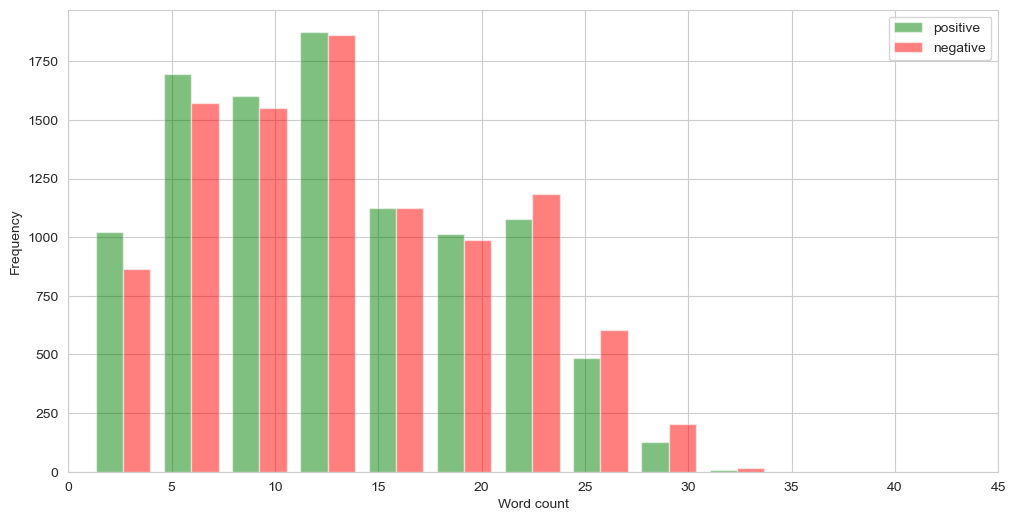

In [39]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [40]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6582),
 ('and', 3706),
 ('you', 2915),
 ('for', 2691),
 ('have', 1778),
 ("i'm", 1654),
 ('that', 1593),
 ('just', 1589),
 ('but', 1531),
 ('with', 1444),
 ('was', 1240),
 ('not', 1227),
 ('this', 1109),
 ('get', 1048),
 ('like', 942),
 ('good', 914),
 ('are', 910),
 ('all', 880),
 ('out', 874),
 ('now', 832)]

<Axes: xlabel='polarity', ylabel='count'>

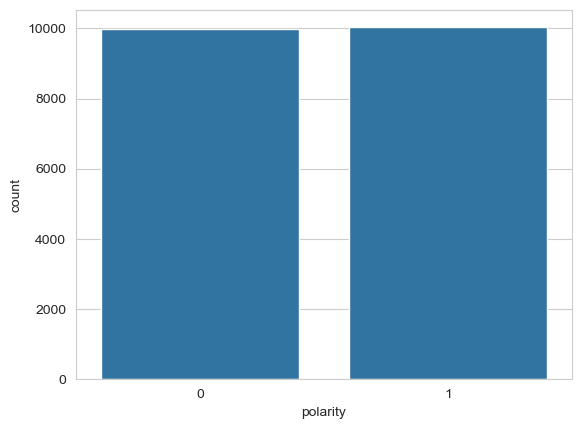

In [41]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [42]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [43]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
594724,0,got nothing to do...
829613,1,painting
221799,0,@musicgeekchic thank you for the recipe. Sadly...
1549172,1,@kclachar yes. Lyrical genius. She takes my br...
200366,0,"June 2nd is come, and I really wanna see that ..."
57506,0,up to phase #2 with BizCha.mp ... looks like I...
594311,0,it's weird. I've been feeling tired and dizzy ...
1107650,1,@MGMarts --Me too. It is raining on and off h...
1213078,1,twitter is highly addictive
401745,0,my mom forgot about me.


In [44]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [45]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [46]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'a', 'should', 'mightn', 'why', 'under', 'they', 'their', 'yourselves', "you've", 'o', 'into', 've', "we'd", "she'll", 're', 'y', 'all', "won't", 'both', 'this', 'any', 'during', "i'm", 'just', 't', 'then', 'hers', "i'd", 'not', 'off', "hasn't", 'hadn', 'myself', 'where', 'we', 'until', "that'll", 'wasn', 'no', "we'll", 'about', 'needn', "it's", 'were', "we've", 'them', 'and', 'mustn', 'd', 'those', 'very', 'in', 'are', 'can', 'down', 'having', 'yourself', 'didn', 'wouldn', 'than', 'how', 'aren', 'but', 'that', 'theirs', 'who', 'doing', 'ours', 'is', "it'll", 'won', 'over', 'isn', 'here', "he's", 'same', 'me', 'to', "doesn't", 'doesn', 'before', 'whom', 'haven', 'our', 'few', "isn't", "didn't", 'did', 'itself', 'when', 'hasn', 'so', 'its', 'his', 'couldn', 'an', 'my', 'himself', 'some', 'which', 'was', 'themselves', 'ain', 'because', 'after', 'while', "needn't", 'had', 'or', "weren't", 'm', 'now', 'of', "should've", "you'll", 'it', "you're", 'the', 'more', 'again', 'at', 'her', 'most'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

In [49]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [50]:
data.head(10)

,polarity,text,processed_tweets
594724,0,got nothing to do...,got nothing to do
829613,1,painting,painting
221799,0,@musicgeekchic thank you for the recipe. Sadly...,thank you for the recipe sadly im at my parent...
1549172,1,@kclachar yes. Lyrical genius. She takes my br...,yes lyrical genius she take my breath away a f...
200366,0,"June 2nd is come, and I really wanna see that ...",june 2nd is come and really wan na see that at...
57506,0,up to phase #2 with BizCha.mp ... looks like I...,up to phase with bizchamp look like ive got wh...
594311,0,it's weird. I've been feeling tired and dizzy ...,it weird ive been feeling tired and dizzy sinc...
1107650,1,@MGMarts --Me too. It is raining on and off h...,me too it is raining on and off here just head...
1213078,1,twitter is highly addictive,twitter is highly addictive
401745,0,my mom forgot about me.,my mom forgot about me


# RNN - LSTM

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


## Hyperparameters

In [52]:
num_epochs = 10
results = {}
params_history = {}
# Define the maximum length of each sequence (number of words per tweet)
max_len = 200

# hidden layer
hidden_units = 8

# LSTM layer
lstm_layers_list = [1, 2, 3]
lstm_units_list = [8, 16, 32, 64, 128]


# Embedding layer
# Define the 5000 most common words
max_words = 5000
embedding_dim = 64

## Converting text data into sequences

In [58]:
# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)
# Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# Pad or truncate all sequences to the same length ('max_len')
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets.shape)

(20000, 200)


## Split Traning and Test data

In [54]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)
print(np.unique(train_label))
print(np.unique(test_label))

[0 1]
[0 1]


## Creating and Traning LSTM Model

In [55]:
def create_lstm_model(lstm_layers, lstm_units):
    model = Sequential()
    model.add(layers.Embedding(max_words, embedding_dim))
    for i in range(lstm_layers):
        return_sequences = i < lstm_layers - 1  # 只有在不是最后一层时才返回序列
        model.add(layers.LSTM(lstm_units, dropout=0.5, return_sequences=return_sequences))
    model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [56]:
models = {}
for lstm_layers in lstm_layers_list:
    for lstm_units in lstm_units_list:
        print(f"Training model with {lstm_layers} LSTM layers and {lstm_units} LSTM units per layer...")

        model = create_lstm_model(lstm_layers, lstm_units)

        history = model.fit(
            train_data, train_label,
            epochs=num_epochs,
            validation_data=(test_data, test_label),
            verbose=2
        )

        results[(lstm_layers, lstm_units)] = {
            'train_acc': history.history['accuracy'][-1],
            'test_acc': history.history['val_accuracy'][-1]
        }

        params_history[(lstm_layers, lstm_units)] = model.count_params()
        models[(lstm_layers, lstm_units)] = model

Training model with 1 LSTM layers and 8 LSTM units per layer...
Epoch 1/10
500/500 - 14s - 29ms/step - accuracy: 0.6726 - loss: 0.5951 - val_accuracy: 0.7500 - val_loss: 0.5179
Epoch 2/10
500/500 - 13s - 25ms/step - accuracy: 0.7891 - loss: 0.4616 - val_accuracy: 0.7548 - val_loss: 0.5119
Epoch 3/10
500/500 - 13s - 25ms/step - accuracy: 0.8205 - loss: 0.4089 - val_accuracy: 0.7548 - val_loss: 0.5246
Epoch 4/10
500/500 - 13s - 25ms/step - accuracy: 0.8380 - loss: 0.3754 - val_accuracy: 0.7540 - val_loss: 0.5282
Epoch 5/10
500/500 - 13s - 25ms/step - accuracy: 0.8522 - loss: 0.3462 - val_accuracy: 0.7460 - val_loss: 0.5475
Epoch 6/10
500/500 - 13s - 26ms/step - accuracy: 0.8651 - loss: 0.3221 - val_accuracy: 0.7467 - val_loss: 0.6036
Epoch 7/10
500/500 - 13s - 25ms/step - accuracy: 0.8772 - loss: 0.2976 - val_accuracy: 0.7383 - val_loss: 0.6279
Epoch 8/10
500/500 - 12s - 25ms/step - accuracy: 0.8818 - loss: 0.2819 - val_accuracy: 0.7377 - val_loss: 0.6635
Epoch 9/10
500/500 - 12s - 25ms/

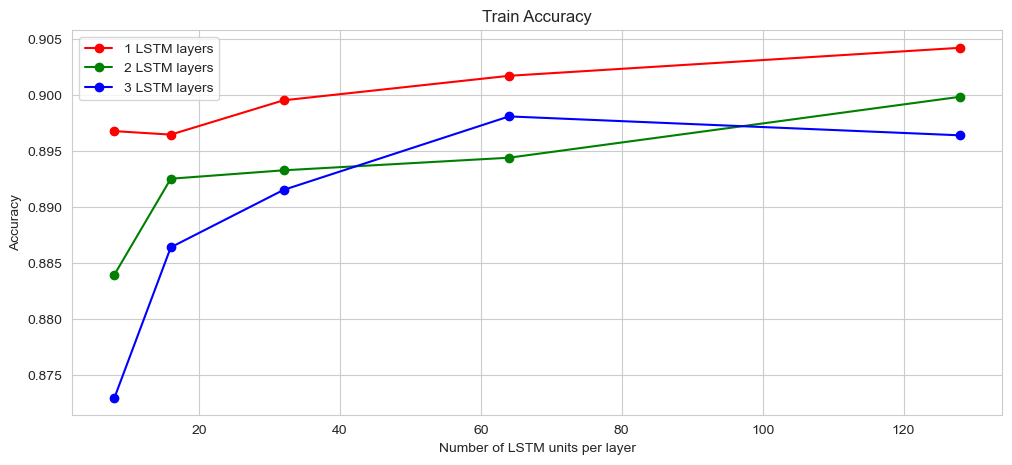

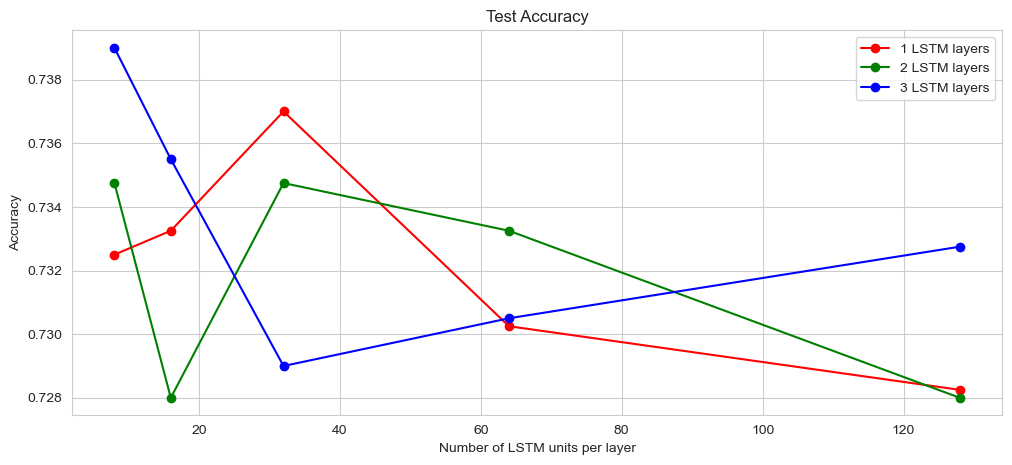

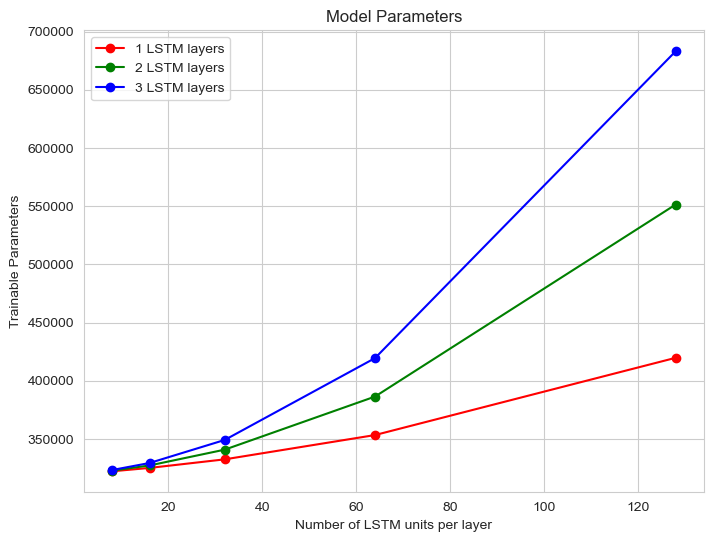

In [60]:
colors = ['red', 'green', 'blue']
# --- 训练精度折线图 ---
plt.figure(figsize=(12, 5))
for i, lstm_layers in enumerate(lstm_layers_list):
    train_acc = [results[(lstm_layers, lstm_units)]['train_acc'] for lstm_units in lstm_units_list]
    plt.plot(lstm_units_list, train_acc, marker='o', linestyle='-', color=colors[i], label=f"{lstm_layers} LSTM layers")
plt.xlabel("Number of LSTM units per layer")
plt.ylabel("Accuracy")
plt.title("Train Accuracy")
plt.legend()
plt.show()

# --- 测试精度折线图 ---
plt.figure(figsize=(12, 5))
for i, lstm_layers in enumerate(lstm_layers_list):
    test_acc = [results[(lstm_layers, lstm_units)]['test_acc'] for lstm_units in lstm_units_list]
    plt.plot(lstm_units_list, test_acc, marker='o', linestyle='-', color=colors[i], label=f"{lstm_layers} LSTM layers")
plt.xlabel("Number of LSTM units per layer")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.show()

# --- 参数量变化折线图 ---
plt.figure(figsize=(8, 6))
for i, lstm_layers in enumerate(lstm_layers_list):
    params = [params_history[(lstm_layers, lstm_units)] for lstm_units in lstm_units_list]
    plt.plot(lstm_units_list, params, marker='o', linestyle='-', color=colors[i], label=f"{lstm_layers} LSTM layers")
plt.xlabel("Number of LSTM units per layer")
plt.ylabel("Trainable Parameters")
plt.title("Model Parameters")
plt.legend()
plt.show()

